In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 6)

In [3]:
df = pd.read_csv("dataset/ARIMA_prep_train.csv")

In [4]:
df.head().T

,0,1,2,3,4
StoreID,1000,1000,1000,1000,1000
Date,2016-03-23,2016-03-24,2016-03-25,2016-03-26,2016-03-28
IsHoliday,0,0,0,0,0
IsOpen,1,1,1,1,1
HasPromotions,1,1,1,0,1
NearestCompetitor,326,326,326,326,326
Region,7,7,7,7,7
NumberOfCustomers,541,626,625,511,637
NumberOfSales,7109,8041,7890,6005,8550
Region_AreaKM2,9643,9643,9643,9643,9643


In [5]:
df.shape

(409237, 50)

In [12]:
df[['NumberOfSales', 'NumberOfCustomers']].corr()

,NumberOfSales,NumberOfCustomers
NumberOfSales,1.000000,0.909194
NumberOfCustomers,0.909194,1.000000


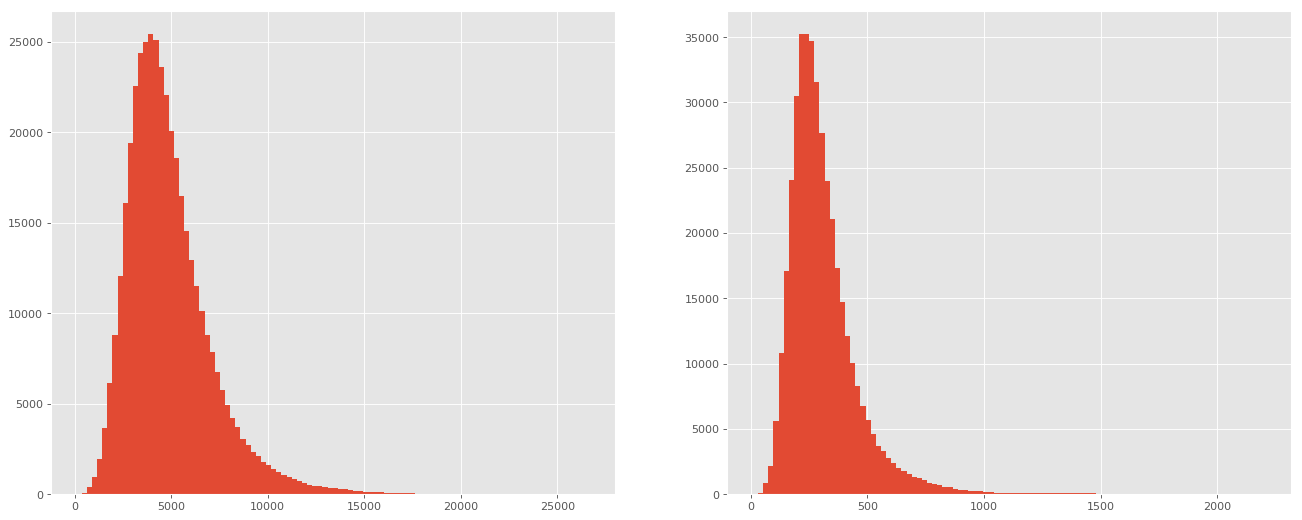

In [7]:
plt.rcParams['figure.figsize'] = [20.0,8.0]
plt.rcParams['figure.dpi']=80
plt.subplot('121')
df['NumberOfSales'].hist(bins=100)
plt.subplot('122')
df['NumberOfCustomers'].hist(bins=100)

In [9]:
y = df.groupby('Day_of_week')['NumberOfSales'].sum()

In [10]:
y

Day_of_week
Friday       335734069.0
Monday       393102876.0
Saturday     284235771.0
Sunday         9006738.0
Thursday     306282480.0
Tuesday      356000352.0
Wednesday    323902522.0
Name: NumberOfSales, dtype: float64

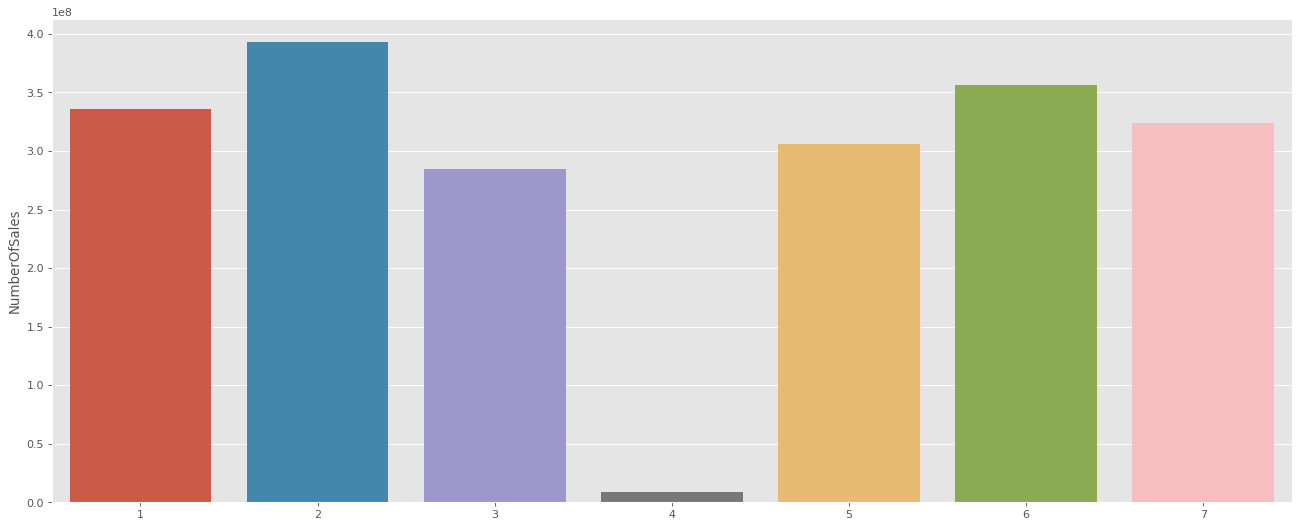

In [11]:
sns.barplot(x=np.arange(7)+1, y=y)

### Creating additional attributes

In [13]:
df['Year'] = df['Date'].apply(lambda x: int(x[:4]))
df['Month'] = df['Date'].apply(lambda x: int(x[5:7]))
df['Day'] = df['Date'].apply(lambda x: int(x[8:10]))

In [16]:
yms = df.groupby(['Year', 'Month'])['NumberOfSales'].sum()

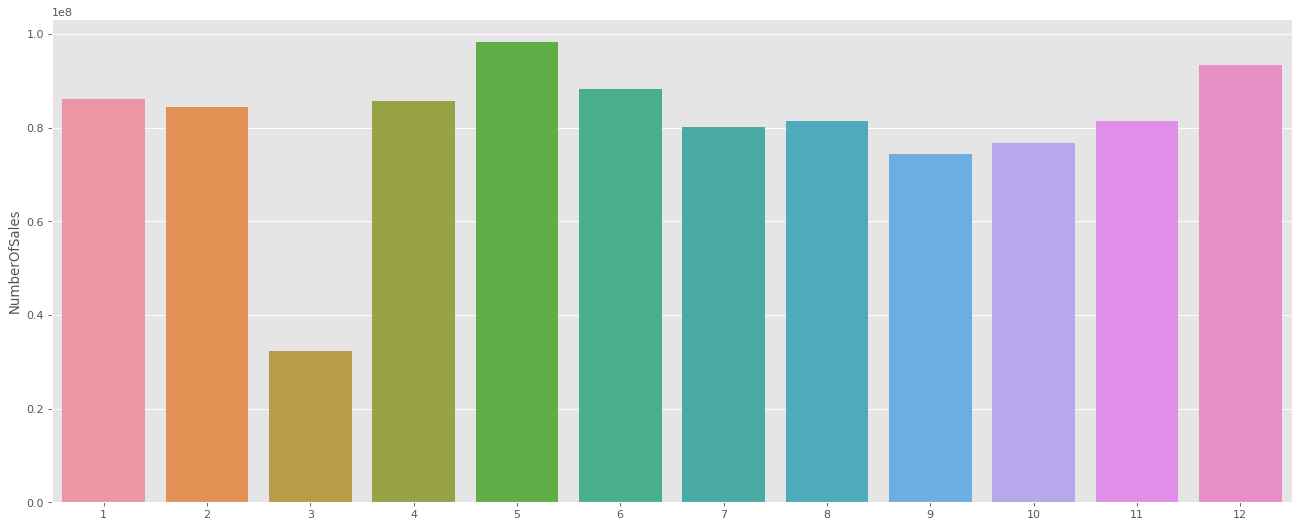

In [19]:
sns.barplot(x=np.arange(12)+1, y=yms[2017].sort_index())

# RANDOM FOREST REGRESSION

In [26]:
df = df.drop(['Date','StoreID','Region','Events','Day_of_week'], axis=1)
df.head().T

,0,1,2,3,4
IsHoliday,0.00,0.0,0.0,0.000000,0.000000
IsOpen,1.00,1.0,1.0,1.000000,1.000000
HasPromotions,1.00,1.0,1.0,0.000000,1.000000
NearestCompetitor,326.00,326.0,326.0,326.000000,326.000000
NumberOfCustomers,541.00,626.0,625.0,511.000000,637.000000
NumberOfSales,7109.00,8041.0,7890.0,6005.000000,8550.000000
Region_AreaKM2,9643.00,9643.0,9643.0,9643.000000,9643.000000
Region_GDP,17130.00,17130.0,17130.0,17130.000000,17130.000000
Region_PopulationK,2770.00,2770.0,2770.0,2770.000000,2770.000000
CloudCover,6.00,6.0,5.0,7.000000,6.000000


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('NumberOfSales', axis=1).values, df.NumberOfSales.values,\
                                                    test_size = 0.2)

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
params = range(30, 81, 10)  #50,201,50

In [42]:
scores, tst_scr = validation_curve(RandomForestRegressor(), X_train[:20000],\
                                   y_train[:20000], 'n_estimators', params, \
                                   cv=5, scoring='r2', verbose=2)

[CV] n_estimators=30 .................................................
[CV] .................................. n_estimators=30, total=   9.0s
[CV] n_estimators=40 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.1s remaining:    0.0s


[CV] .................................. n_estimators=40, total=  12.1s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=  15.0s
[CV] n_estimators=60 .................................................
[CV] .................................. n_estimators=60, total=  18.2s
[CV] n_estimators=70 .................................................
[CV] .................................. n_estimators=70, total=  22.9s
[CV] n_estimators=80 .................................................
[CV] .................................. n_estimators=80, total=  24.5s
[CV] n_estimators=30 .................................................
[CV] .................................. n_estimators=30, total=   9.5s
[CV] n_estimators=40 .................................................
[CV] .................................. n_estimators=40, total=  12.9s
[CV] n_estimators=50 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 11.4min finished


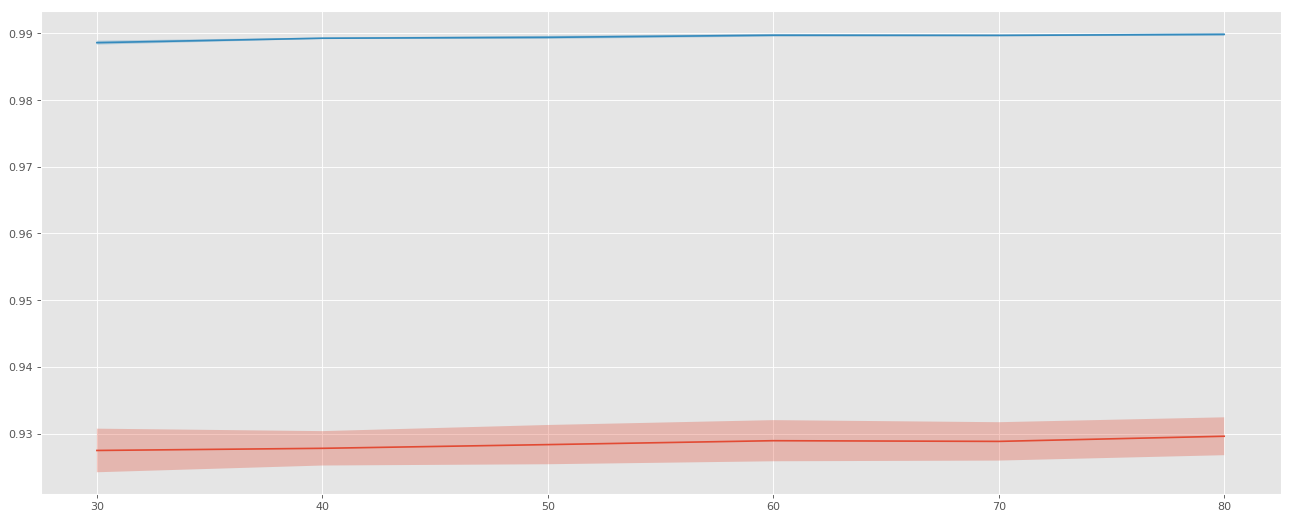

In [43]:
scores_mean = scores.mean(axis=1)
scores_std = scores.std(axis=1)
tst_scr_mean = tst_scr.mean(axis=1)
tst_scr_std = tst_scr.std(axis=1)
plt.plot(params, tst_scr_mean)
plt.fill_between(params, tst_scr_mean + tst_scr_std, tst_scr_mean - tst_scr_std, alpha=0.3)
plt.plot(params, scores_mean)
plt.fill_between(params, scores_mean + scores_std, scores_mean - scores_std, alpha=0.3)

In [44]:
X_train.shape[1]

47

In [45]:
params = range(3, 9)

In [46]:
scores, tst_scr = validation_curve(RandomForestRegressor(n_estimators=10), X_train[:20000], \
                                   y_train[:20000], 'max_features', params, \
                                   cv=3, scoring='r2', verbose=2)

[CV] max_features=3 ..................................................
[CV] ................................... max_features=3, total=   0.2s
[CV] max_features=4 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ................................... max_features=4, total=   0.3s
[CV] max_features=5 ..................................................
[CV] ................................... max_features=5, total=   0.3s
[CV] max_features=6 ..................................................
[CV] ................................... max_features=6, total=   0.4s
[CV] max_features=7 ..................................................
[CV] ................................... max_features=7, total=   0.4s
[CV] max_features=8 ..................................................
[CV] ................................... max_features=8, total=   0.5s
[CV] max_features=3 ..................................................
[CV] ................................... max_features=3, total=   0.2s
[CV] max_features=4 ..................................................
[CV] ................................... max_features=4, total=   0.3s
[CV] max_features=5 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    9.0s finished


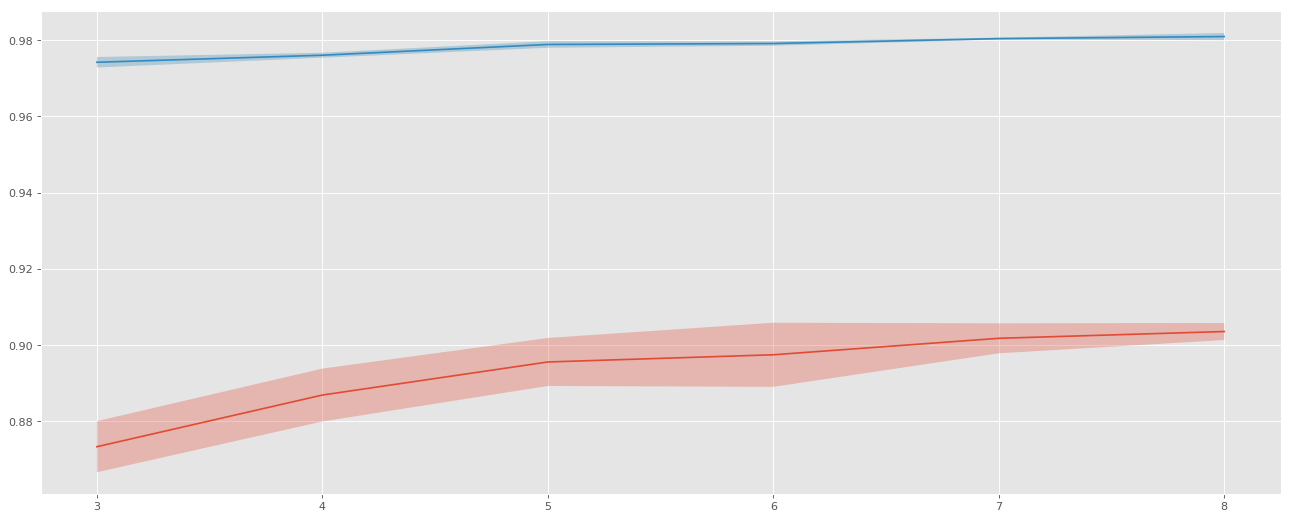

In [47]:
scores_mean = scores.mean(axis=1)
scores_std = scores.std(axis=1)
tst_scr_mean = tst_scr.mean(axis=1)
tst_scr_std = tst_scr.std(axis=1)
plt.plot(params, tst_scr_mean)
plt.fill_between(params, tst_scr_mean + tst_scr_std, tst_scr_mean - tst_scr_std, alpha=0.3)
plt.plot(params, scores_mean)
plt.fill_between(params, scores_mean + scores_std, scores_mean - scores_std, alpha=0.3)

In [ ]:
params = range(5, 51, 5)

In [ ]:
scores, tst_scr = validation_curve(RandomForestRegressor(n_estimators=100), X_train[:20000], \
                                   y_train[:20000], 'max_depth', params, \
                                   cv=3, scoring='r2', verbose=2)

In [ ]:
scores_mean = scores.mean(axis=1)
scores_std = scores.std(axis=1)
tst_scr_mean = tst_scr.mean(axis=1)
tst_scr_std = tst_scr.std(axis=1)
plt.plot(params, tst_scr_mean)
plt.fill_between(params, tst_scr_mean + tst_scr_std, tst_scr_mean - tst_scr_std, alpha=0.3)
plt.plot(params, scores_mean)
plt.fill_between(params, scores_mean + scores_std, scores_mean - scores_std, alpha=0.3)

In [50]:
model1 = RandomForestRegressor(n_estimators=100, max_depth=20, n_jobs=-1, verbose=2)

In [51]:
model1.fit(X_train, y_train)

building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.6min


building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  9.6min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=2, warm_start=False)

In [52]:
idx = model1.feature_importances_.argsort()[::-1]

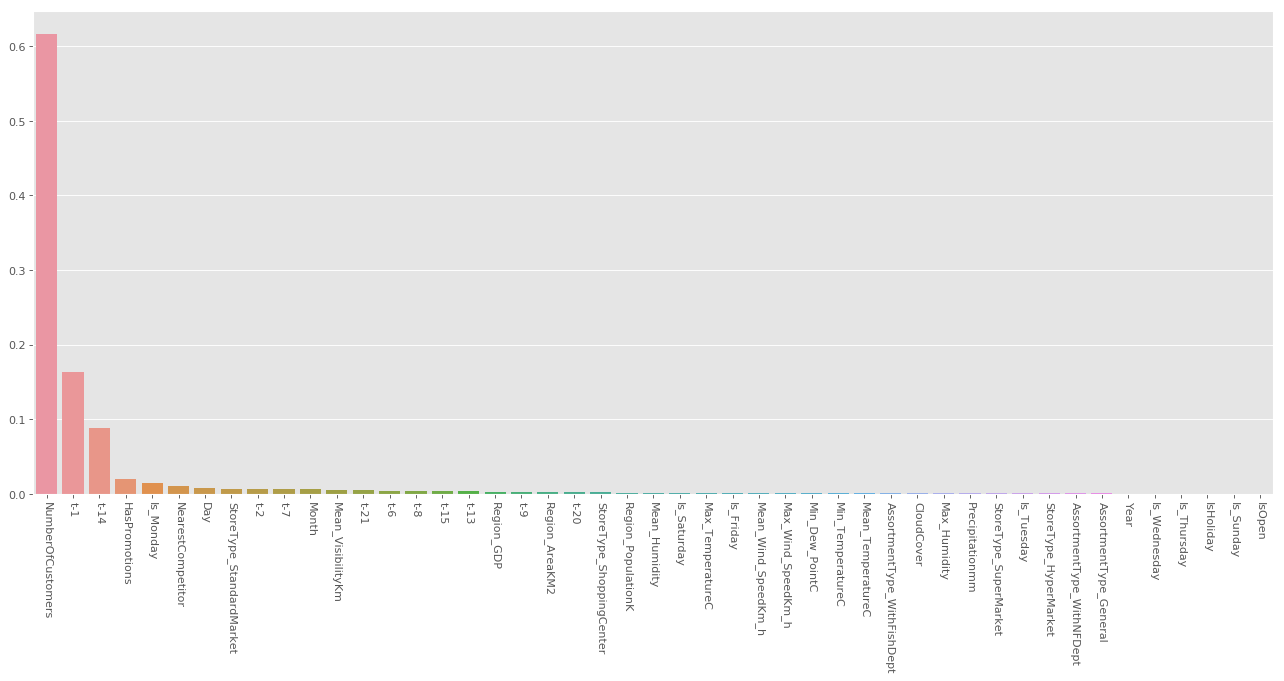

In [55]:
ax = sns.barplot(x=df.drop('NumberOfSales', axis=1).columns[idx], y=model1.feature_importances_[idx])
_ = plt.setp(ax.get_xticklabels(), rotation=-90)

### I forgot to drop NumberOfCustomers...

In [56]:
y_pred = model1.predict(X_test)

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.9s finished


In [57]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [58]:
mean_absolute_error(y_test, y_pred)

301.1941956839615

In [59]:
r2_score(y_test, y_pred)

0.9602671551484901

## For the submission

In [ ]:
df_test = pd.read_csv

In [ ]:
df_test.IsOpen.unique()

In [ ]:
ind_open = df_test.IsOpen == 1
ind_closed = df_test.IsOpen == 0
df_test2 = df_test[ind_open]

In [ ]:
df_test2.drop('IsOpen', axis=1, inplace=True)

In [ ]:
df_test2.head().T

In [ ]:
X_out = df_test2.values

In [ ]:
y_out = model1.predict(X_out)

In [ ]:
df_out = pd.DataFrame(np.zeros(len(df_test)), columns=['NumberOfSales'])

In [ ]:
df_out[ind_open] = y_out.reshape(-1,1)

In [ ]:
df_out.set_index(np.arange(len(df_out))+1, inplace=True)

In [ ]:
df_out.index.name = 'Id'

In [ ]:
df_out.head()